In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from helper import get_data, prepare_data

In [2]:
TICKER = 'SBER'
start_date = '2022-08-24'
end_date = '2023-09-24'

In [3]:
df = get_data(TICKER, start_date, end_date)
df = prepare_data(df)
df.head()

,open,close,high,low,value,Date
0,130.60,128.15,131.64,127.85,5.940974e+09,2022-08-24
1,128.15,128.18,129.81,127.10,4.630468e+09,2022-08-25
2,128.02,130.40,130.50,127.62,4.251007e+09,2022-08-26
3,130.12,131.17,131.40,129.52,5.342794e+09,2022-08-29
4,131.17,130.05,132.60,129.65,6.706724e+09,2022-08-30


In [26]:
dates = df['Date']
open_prices = df['open']
close_prices = df['close']

In [8]:
# TODO calculate max drawdown

In [9]:
def find_drawdown(prices_vec: np.array):
    """
        Функция поиска максимальной просадки.

        Алгоритм:
            1. Создаем две переменные для хранения максимальной просадки и
               максимального значения вектора цен в текущий момент.
            2. Итеративно проходим по всем точка вектора кумулятивной доходности и
                2.1. Если текущее значение цены превышает максимальное,
                перезапишем. Это условие говорит о том, что сейчас график идет в рост и 
                падения не на наблюдается.
                2.2. Если разница между максимальным и текущим значениями цен
                превышают максимальную просадку - перезаписываем значение максимальной просадки.
                2.3. Если ни одно условие не выполнилось, делаем шаг и повторяем.

        Аргументы:
            prices_vec, numpy.array - вектор цен инструмента

        Возвращаемое значение:
            max_drawdown, float - величина максимальной просадки
            drawdown_start, float - точка максимума просадки как значение цены интрумента
            drawdown_end, float - точки минимума просадки как значение цены инструмента
            
    """
    
    max_drawdown, max_price = 0, 0
    drawdown_start, draw_down_end = 0, 0
    
    for _, price in enumerate(prices_vec):
        if price >= max_price:
            max_price=price
            # continue
        # else:
        if max_price - price >= max_drawdown:
            max_drawdown = max_price - price
            drawdown_start, draw_down_end = max_price, price

    return max_drawdown, drawdown_start, draw_down_end

In [10]:
drawdown, drawdown_start, drawdown_end = find_drawdown(close_prices)
drawdown

42.30000000000001

In [27]:
_dates = []

format = '%Y-%m-%d'

for date in dates:
    _dates.append(date.strftime(format))
dates = np.array(_dates)

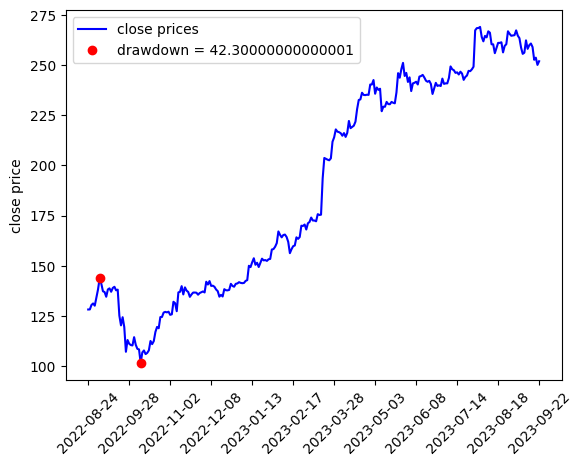

In [30]:
plt.plot(close_prices, label='close prices', color='blue')
plt.plot(np.where(close_prices == drawdown_start)[0][0], drawdown_start, 'ro', label=f'drawdown = {drawdown}')
plt.plot(np.where(close_prices == drawdown_end)[0][0], drawdown_end, 'ro')
plt.ylabel('close price')
plt.xticks(np.arange(0, len(dates), 25), dates[np.arange(0, len(dates), 25)], rotation=45)
plt.legend()
plt.show()